In [36]:
from sklearn.datasets import fetch_openml, load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

In [3]:
X,y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [4]:
X = X/255

In [5]:
digits = 10
examples = y.shape[0]

y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [6]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

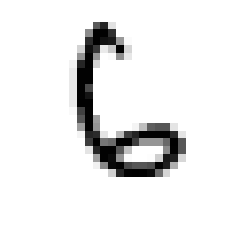

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [9]:
%matplotlib inline

i = 12
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[:,i]

In [12]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [13]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

In [16]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(350):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 1 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  9.634823614361112
Epoch 1 cost:  6.690773594779423
Epoch 2 cost:  5.0526030752619615
Epoch 3 cost:  4.508825473457557
Epoch 4 cost:  4.064870651674643
Epoch 5 cost:  3.7562686994245635
Epoch 6 cost:  3.490374973932323
Epoch 7 cost:  3.2591944111328752
Epoch 8 cost:  3.056651577810996
Epoch 9 cost:  2.8786034700705243
Epoch 10 cost:  2.7213577647844844
Epoch 11 cost:  2.5819351490798645
Epoch 12 cost:  2.4578174287487737
Epoch 13 cost:  2.346883889620477
Epoch 14 cost:  2.247349273272459
Epoch 15 cost:  2.157700203647947
Epoch 16 cost:  2.076652697862554
Epoch 17 cost:  2.0031096803563853
Epoch 18 cost:  1.9361308112459956
Epoch 19 cost:  1.8749083306503624
Epoch 20 cost:  1.8187478958111913
Epoch 21 cost:  1.767052802383038
Epoch 22 cost:  1.719310080003562
Epoch 23 cost:  1.6750785245558355
Epoch 24 cost:  1.6339779424594665
Epoch 25 cost:  1.5956799361337324
Epoch 26 cost:  1.559899871475424
Epoch 27 cost:  1.5263901268024276
Epoch 28 cost:  1.494934365154262
Epoch 29 

Epoch 232 cost:  0.5392044378132905
Epoch 233 cost:  0.5382883990411549
Epoch 234 cost:  0.5373785808578436
Epoch 235 cost:  0.5364749112581929
Epoch 236 cost:  0.5355773193671782
Epoch 237 cost:  0.5346857354181113
Epoch 238 cost:  0.5338000907313265
Epoch 239 cost:  0.5329203176933515
Epoch 240 cost:  0.5320463497365393
Epoch 241 cost:  0.5311781213191548
Epoch 242 cost:  0.5303155679058997
Epoch 243 cost:  0.5294586259488648
Epoch 244 cost:  0.5286072328689001
Epoch 245 cost:  0.5277613270373855
Epoch 246 cost:  0.526920847758398
Epoch 247 cost:  0.5260857352512619
Epoch 248 cost:  0.5252559306334736
Epoch 249 cost:  0.5244313759039876
Epoch 250 cost:  0.5236120139268622
Epoch 251 cost:  0.5227977884152489
Epoch 252 cost:  0.5219886439157211
Epoch 253 cost:  0.5211845257929333
Epoch 254 cost:  0.5203853802146037
Epoch 255 cost:  0.5195911541368107
Epoch 256 cost:  0.5188017952895987
Epoch 257 cost:  0.5180172521628861
Epoch 258 cost:  0.5172374739926663
Epoch 259 cost:  0.5164624107

In [32]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

In [33]:
cf_matrix = confusion_matrix(predictions, labels)

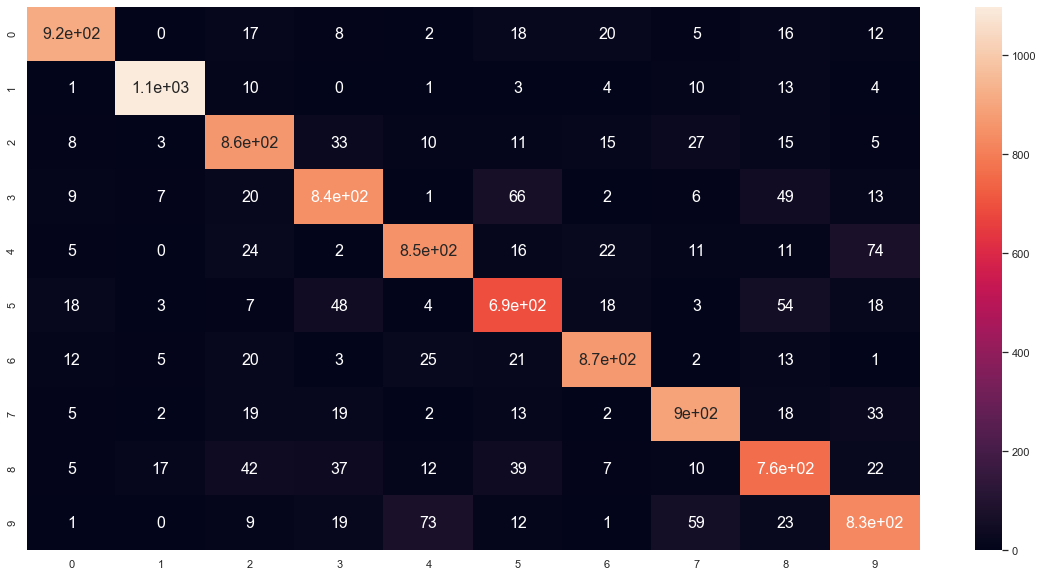

In [34]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [20,10]
label = ['0','1','2','3','4','5','6','7','8','9']
df_cm = pd.DataFrame(cf_matrix, label, label)
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={"size":16})
plt.show()

In [35]:
print(classification_report(predictions, labels))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92      1014
           1       0.97      0.96      0.96      1144
           2       0.84      0.87      0.85       991
           3       0.83      0.83      0.83      1014
           4       0.87      0.84      0.85      1017
           5       0.78      0.80      0.79       866
           6       0.91      0.89      0.90       969
           7       0.87      0.89      0.88      1008
           8       0.78      0.80      0.79       953
           9       0.82      0.81      0.81      1024

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

